# Exploratory Data Analysis (EDA) - Amazon Fine Food Reviews Dataset
Notebook thực hiện phân tích dữ liệu khám phá (EDA) trên tập dữ liệu Amazon Fine Food Reviews.
Chúng ta sẽ thực hiện các bước: 
- Tải dữ liệu và kiểm tra thông tin dữ liệu
- Xử lý dữ liệu bị thiếu và trùng lặp
- Tiền xử lý dữ liệu văn bản
- Phân tích dữ liệu đơn biến và đa biến dựa trên dữ liệu đã tiền xử lý
- Trực quan hóa kết quả dữ liệu


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Tải bộ dữ liệu hỗ trợ của NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Cấu hình font chữ của Matplotlib
plt.rcParams['font.family'] = 'Arial'


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Đọc dữ liệu và kiểm tra tổng quan

In [2]:
# Đọc dataset
df = pd.read_csv("Reviews.csv")

# Hiển thị thông tin tổng quan
print(f'+ Shape: {df.shape}')
print(df.info())
print(f'+ Contents')
display.display(df.head(5))


+ Shape: (568454, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None
+ Contents


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Nhận xét:
- Dữ liệu có khoảng **570,000** đánh giá.
- Gồm **10 cột**, quan trọng nhất là `Score` (điểm đánh giá) và `Text` (nội dung đánh giá).
- Cần kiểm tra dữ liệu trống và trùng lặp trước khi phân tích.

## Kiểm tra dữ liệu trống và trùng lặp

In [3]:
# Kiểm tra dữ liệu trống và trùng lặp
print("Dữ liệu trống:")
print(df.isnull().sum())
display.display(df[df.isnull().any(axis=1)])

print("\nSố đánh giá trùng lặp:", df.duplicated(subset=['Text']).sum())
display.display(df[df.duplicated(subset=['Text'])])


Dữ liệu trống:
Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
10616,10617,B002DHN956,A1LSYR30XW7CFT,NaN,1,2,5,1291680000,Awesome,This is 72 for the price of like 24 at the gro...
25509,25510,B000LKZB4Y,A36BVYD0NT7Z0F,NaN,0,0,5,1314576000,These are the best mints and no aspartame or BHT,I was so shocked to find out that almost all g...
33958,33959,B00412W76S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
38874,38875,B000AYDGZ2,A36BVYD0NT7Z0F,NaN,2,3,1,1278374400,doesn't anyone care that they are putting BHT ...,I called Kellogg's to see why Special K red be...
40548,40549,B00020HHRW,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
47923,47924,B004SRH2B6,A2DEHJJIEAPPBF,NaN,0,0,5,1338940800,Great taste,Enjoy drinking this brand. Tastes as good as ...
49800,49801,B000CRHQN0,A2LYFY32LXQDON,NaN,0,0,2,1282608000,They were melted and the chocolate had turned ...,We love these bars but i won't order them ship...
67077,67078,B0006348H2,A2P0P67Y55SNOX,NaN,1,1,5,1314662400,Wheatgrass,Kitty seems to like this sprinkled on her food...
101106,101107,B0014B0HWK,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
102979,102980,B000FVDWU4,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...



Số đánh giá trùng lặp: 174875


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
603,604,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,1229385600,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


### Nhận xét:
- Phát hiện **26 dòng** bị thiếu `ProfileName` và **27 dòng** thiếu `Summary`.
- Có **174,875** dòng trùng lặp trong cột `Text`.
- Cần loại bỏ các dòng dữ liệu trùng lặp và bị thiếu trước khi phân tích.

## Tiền xử lý dữ liệu

In [4]:
# Loại bỏ dòng bị thiếu & trùng lặp
df = df.drop_duplicates(subset=['Text']).dropna()
print("\n✅ Đã loại bỏ các dòng trùng lặp và dữ liệu trống!")
print(f"\n✅ Số dòng sau tiền xử lý: {df.shape[0]}")

#Làm sạch văn bản trong Text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def fast_clean_text(text):
    text = text.lower()  # Chuyển chữ thường
    text = re.sub(r'[^\w\s]', '', text)  # Xóa dấu câu
    words = word_tokenize(text)  # Tách từ
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]  # Xóa stopwords + lemmatization
    return " ".join(words)

df['Text_Cleaned'] = df['Text'].map(fast_clean_text)

# Lưu file kết quả
df.to_csv("dataEDA.csv", index=False)
print("\n✅ Dữ liệu đã lưu vào: dataEDA.csv 🎯")



✅ Đã loại bỏ các dòng trùng lặp và dữ liệu trống!

✅ Số dòng sau tiền xử lý: 393560

✅ Dữ liệu đã lưu vào: dataEDA.csv 🎯


### Thực hiện tiền xử lý
- Loại bỏ các dữ liệu trùng lặp trên cột Text, loại bỏ các dòng bị thiếu dữ liệu
- Chuyển toàn bộ văn bản trong Text về chữ thường
- Loại bỏ dấu câu và kí tự đặc biệt
- Loại bỏ stopwords
- Chuẩn hóa từ về dạng gốc với Lemmatization
### Nhận xét:
- Sau khi xử lý, còn **393,560** đánh giá hợp lệ.
- Văn bản đã được làm sạch bằng cách loại bỏ trùng lặp, dữ liệu trống và xử lý văn bản.

## Phân tích đơn biến (Univariate Analysis)

C:\Users\Admin\AppData\Local\Temp\ipykernel_35180\4197791368.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Score'], palette="viridis")


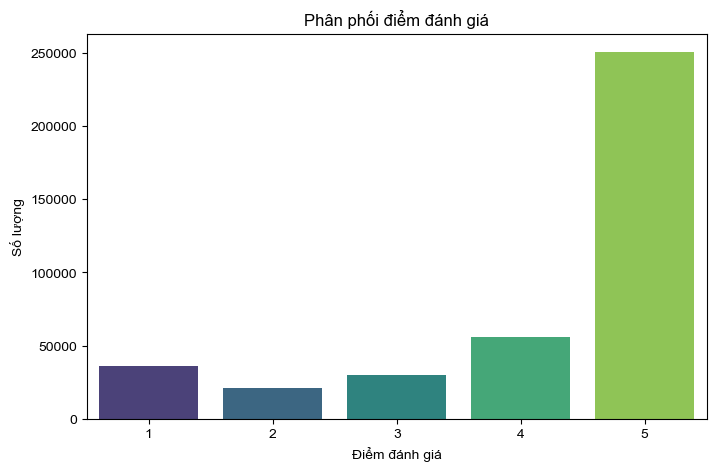

In [5]:
# Đọc lại file sau tiền xử lý
df = pd.read_csv("dataEDA.csv")

# Vẽ biểu đồ phân phối điểm đánh giá
plt.figure(figsize=(8,5))
sns.countplot(x=df['Score'], palette="viridis")
plt.xlabel("Điểm đánh giá")
plt.ylabel("Số lượng")
plt.title("Phân phối điểm đánh giá")
plt.show()


## Nhận xét:
- Đánh giá **5 sao chiếm đa số**, cho thấy phần lớn khách hàng có trải nghiệm tốt.
- **Đánh giá 1 và 2 sao ít hơn nhiều**, có thể gây mất cân bằng dữ liệu khi huấn luyện mô hình.

## Phân tích phân phối cảm xúc

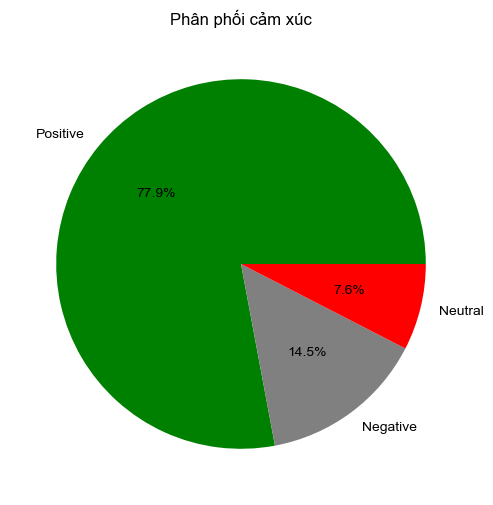

In [6]:
# Hàm xác định cảm xúc từ điểm số
def sentiment_label(score):
    if score >= 4:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"

df['Sentiment'] = df['Score'].apply(sentiment_label)

# Vẽ biểu đồ phân phối cảm xúc
plt.figure(figsize=(6,6))
df['Sentiment'].value_counts().plot.pie(autopct="%1.1f%%", colors=['green', 'gray', 'red'])
plt.title("Phân phối cảm xúc")  
plt.ylabel("")  
plt.show()


### Nhận xét:
- **77.9%** đánh giá là tích cực (4-5 sao), chỉ **14.5%** là tiêu cực (1-2 sao).
- Điều này có thể khiến mô hình dự đoán bị thiên lệch về phía tích cực.

## Phân tích độ dài bài đánh giá

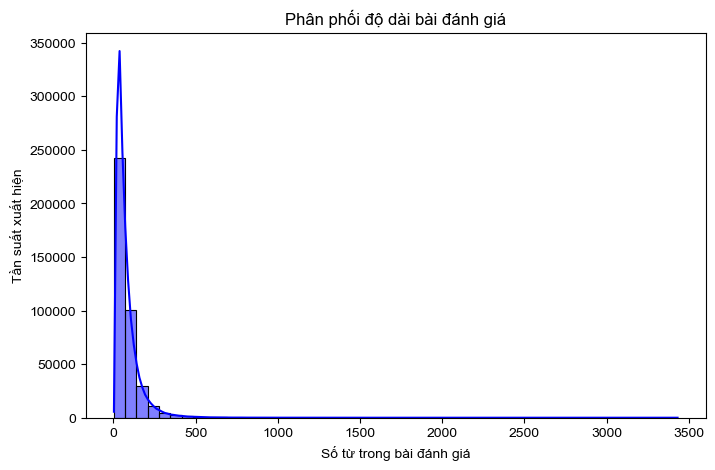

C:\Users\Admin\AppData\Local\Temp\ipykernel_35180\3146591175.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Sentiment'], y=df['do_dai_danh_gia'], palette="coolwarm")


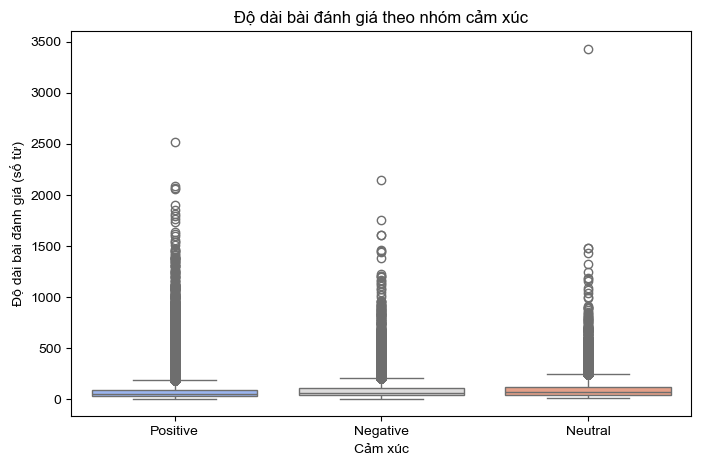

In [7]:
# Tạo cột mới lưu độ dài bài đánh giá
df['do_dai_danh_gia'] = df['Text'].apply(lambda x: len(str(x).split()))

# Vẽ biểu đồ phân phối độ dài đánh giá
plt.figure(figsize=(8,5))
sns.histplot(df['do_dai_danh_gia'], bins=50, kde=True, color='blue')
plt.xlabel("Số từ trong bài đánh giá")
plt.ylabel("Tần suất xuất hiện")
plt.title("Phân phối độ dài bài đánh giá")
plt.show()

# So sánh độ dài bài đánh giá theo cảm xúc (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Sentiment'], y=df['do_dai_danh_gia'], palette="coolwarm")
plt.xlabel("Cảm xúc")
plt.ylabel("Độ dài bài đánh giá (số từ)")
plt.title("Độ dài bài đánh giá theo nhóm cảm xúc")
plt.show()


### Nhận xét:
- **Độ dài trung bình** của đánh giá nằm trong khoảng **30-100 từ**.
- Đánh giá tiêu cực thường ngắn hơn đánh giá tích cực.

## Phân tích tương quan

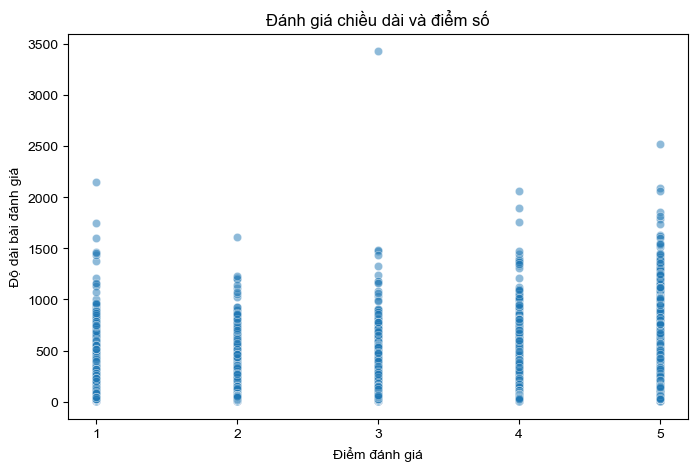

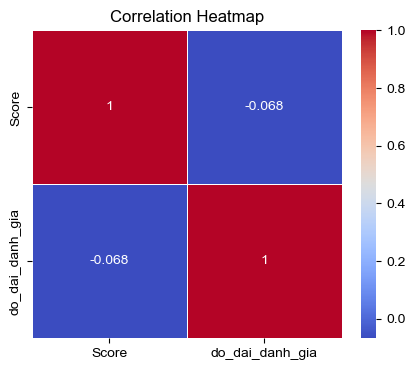

In [8]:
# Biểu đồ phân tán scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Score'], y=df['do_dai_danh_gia'], alpha=0.5)
plt.xticks([1, 2, 3, 4, 5]) 
plt.xlabel("Điểm đánh giá")
plt.ylabel("Độ dài bài đánh giá")
plt.title("Đánh giá chiều dài và điểm số")
plt.show()

# Ma trận tương quan heatmap
correlation_matrix = df[['Score', 'do_dai_danh_gia']].corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### Nhận xét:
- **Không có mối quan hệ mạnh** giữa độ dài bài đánh giá và điểm số.
- Hệ số tương quan thấp (-0.062), tức là bài đánh giá dài hơn không có nghĩa là điểm cao hơn.

## Kết thúc